In [7]:
import sys
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import os
import base64
from collections import deque
from collections import namedtuple
import pickle 

display
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import logging

# gym
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

# Local .py files
from visualization import *
from DQN import *
from DQN_utils import *
from DQN_agent import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on", device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on cpu


In [8]:
CHECKPOINT_FOLDERNAME = "checkpoints/"
CHECKPOINT_PREFIX="vanilla_survival"
MEMORY_SIZE = 1e4 # 1e6 in paper
# BURN_IN = 1e5
BATCH_SIZE = 32
LEARNING_RATE = 2.5e-4
GAMMA = 0.99
MAX_EPISODES = 5e3
EPSILON = 0.25
INITIAL_EPSILON = 1; FINAL_EPSILON=0.1; FINAL_EPSILON_EPISODE=1e3
NETWORK_SYNC_FREQ = 10000
NETWORK_UPDATE_FREQ = 4
NETWORK_SAVE_FREQ = 100
NETWORK_EVALUATE_FREQ = 1000
N_VAL_EPISODES = 1

# Vanilla
env = gym.make("MsPacman-v0")
D = experienceReplayBuffer(memory_size=MEMORY_SIZE)
dqn = DQN(
    env, 
    learning_rate=LEARNING_RATE,
    device=device, 
    checkpoint_path=CHECKPOINT_FOLDERNAME
)
agent = DQN_agent(env, dqn, D, epsilon=EPSILON)
agent.train(
    gamma=GAMMA,
    max_episodes= MAX_EPISODES,
    batch_size=BATCH_SIZE,
    network_update_frequency = NETWORK_UPDATE_FREQ,
    network_sync_frequency = NETWORK_SYNC_FREQ,
    network_save_frequency = NETWORK_SAVE_FREQ,
    network_evaluate_frequency=NETWORK_EVALUATE_FREQ,
    n_val_episodes=N_VAL_EPISODES,
    checkpoint_path = CHECKPOINT_FOLDERNAME,
    checkpoint_prefix = CHECKPOINT_PREFIX,
    epsilon_start=INITIAL_EPSILON,
    epsilon_end=FINAL_EPSILON,
    epsilon_final_episode=FINAL_EPSILON_EPISODE
)

NameError: name 'HDQN_sep' is not defined

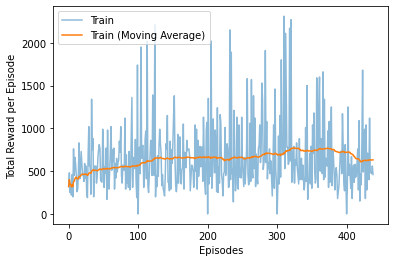

In [0]:
env = gym.make("MsPacman-v0")
dqn = DQN(env, learning_rate=1e-3, device=device)
pth = CHECKPOINT_FOLDERNAME+'checkpoint_'+str(1800)+'_eps.pth'
dqn.load_state_dict(torch.load(pth))
r = play_with_network(env, dqn)